In [2]:
# Import Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("/content/Iris (1).csv")
df.head()

In [ ]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# Let's check if we have something missing?
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Let's do some EDA

In [ ]:
feature = df.columns

## Let's perfrom Outlier Treatment

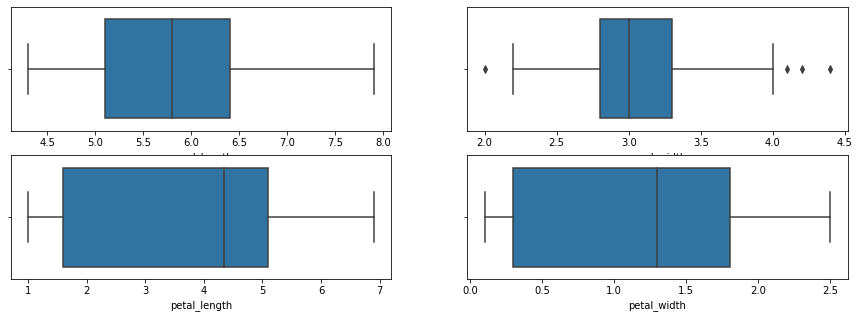

In [ ]:
plt.figure(figsize = (15, 5))
feature = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]])

In [ ]:
sns.boxplot('sepal_width', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [ ]:
# Assignment: 

# find out those countries that are in need of the aid
# We should not remove outliers that are in the lower range but we can cap them
# When a column have so many outliers in either upper or lower range, then we can ignore that column

## Data Preparation

In [ ]:
df1 = df.copy()

In [ ]:
df.drop('id', axis = 1, inplace = True)

In [ ]:
## Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
df2 = scale.fit_transform(df)

In [ ]:
df2 = pd.DataFrame(df2)
df2.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.054478,-1.341272,-1.312977
1,-1.143017,-0.125943,-1.341272,-1.312977
2,-1.385353,0.346225,-1.398138,-1.312977
3,-1.506521,0.110141,-1.284407,-1.312977
4,-1.021849,1.290562,-1.341272,-1.312977


In [ ]:
## Hopkins Score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
hopkins(df2)

0.8254831861233146

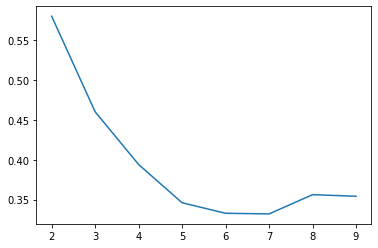

In [ ]:
# Choose the value of K
# Silhouette
# Elbow Curve

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters = k).fit(df2)
    ss.append([k, silhouette_score(df2, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])

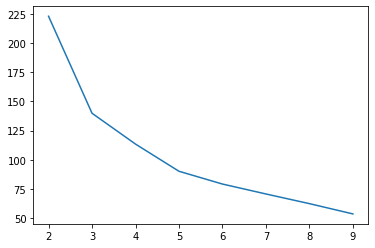

In [ ]:
ssd = []
for k in range(2, 10):
    model= KMeans(n_clusters = k).fit(df2)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])

In [ ]:
# Let's run kmean with 3

kmean = KMeans(n_clusters = 3, random_state = 100)
kmean.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [ ]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,id
0,5.1,3.5,1.4,0.2,100
1,4.9,3.0,1.4,0.2,101
2,4.7,3.2,1.3,0.2,102
3,4.6,3.1,1.5,0.2,103
4,5.0,3.6,1.4,0.2,104


In [ ]:
df_km = pd.concat([df1, pd.Series(kmean.labels_)], axis =1)

In [ ]:
df_km.head()

,sepal_length,sepal_width,petal_length,petal_width,id,0
0,5.1,3.5,1.4,0.2,100,0
1,4.9,3.0,1.4,0.2,101,0
2,4.7,3.2,1.3,0.2,102,0
3,4.6,3.1,1.5,0.2,103,0
4,5.0,3.6,1.4,0.2,104,0


## Cluster Profiling

In [ ]:
# Find the countries that are in need to aid based on 3 column, GDPP, Child_mort, Income

In [ ]:
df_km.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'id', 'label']
df_km.head()

,sepal_length,sepal_width,petal_length,petal_width,id,label
0,5.1,3.5,1.4,0.2,100,0
1,4.9,3.0,1.4,0.2,101,0
2,4.7,3.2,1.3,0.2,102,0
3,4.6,3.1,1.5,0.2,103,0
4,5.0,3.6,1.4,0.2,104,0


In [ ]:
df_km.label.value_counts()

2    53
0    50
1    47
Name: label, dtype: int64

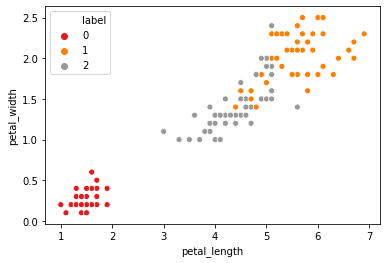

In [ ]:
sns.scatterplot(x = "petal_length" , y = "petal_width", hue = 'label', data = df_km, palette = "Set1")

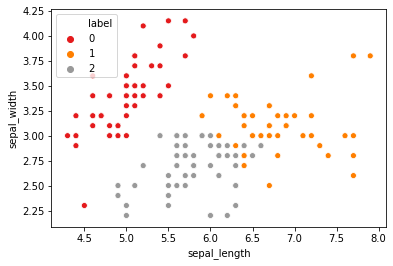

In [ ]:
sns.scatterplot(x = "sepal_length" , y = "sepal_width", hue = 'label', data = df_km, palette = "Set1")

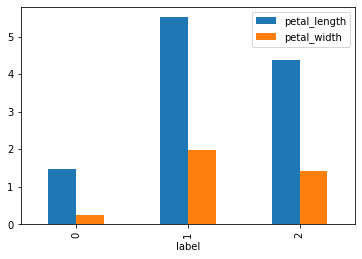

In [ ]:
# GDPP, Child_mort, Income
# LOW GDPP
# High Child_mort
# Low Income
df_km[['petal_length', 'petal_width', 'label']].groupby("label").mean().plot(kind = 'bar')

In [ ]:
df_km[df_km['label']==0].sort_values(by = ['petal_length', 'petal_width'], ascending = [True, True])

,sepal_length,sepal_width,petal_length,petal_width,id,label
22,4.6,3.600,1.0,0.2,122,0
13,4.3,3.000,1.1,0.1,113,0
14,5.8,4.000,1.2,0.2,114,0
35,5.0,3.200,1.2,0.2,135,0
2,4.7,3.200,1.3,0.2,102,0
36,5.5,3.500,1.3,0.2,136,0
38,4.4,3.000,1.3,0.2,138,0
42,4.4,3.200,1.3,0.2,142,0
40,5.0,3.500,1.3,0.3,140,0
41,4.5,2.300,1.3,0.3,141,0


In [ ]:
## Hirerachical clustering